# K-means clustering

## Learning objectives
- implement K-means clustering from scratch


## Intro - unsupervised clustering

### The K-means clustering algorithm can be used for supervised classification, or for unsupervised clustering.

So far we have only discussed the supervised learning case
Supervised learning is where our dataset includes labels.
Unsupervised learning is where our dataset does not include labels.
In this case, the goal is not to predict a label (because our model has no idea what a label should look like for each example), but to instead uncover some underlying structure of the data.


### What is clustering?
One way to characterise some structure in the data would be to group together different examples into clusters, this is known as **clustering**.

There are many ways to do perform clustering.
Each of them may produce different clusters and shapes of clusters.
This notebook covers the K-means clustering algorithm.

## The K-means clustering algorithm
K-means clustering is a simple clustering algorithm that firstly initialises K random points in feature space, which we call centroids, that are each associated to a particular cluster.
Each example is then assigned to be a member of the cluster whose centroid it is closest to.
The position of each centroid is then updated to the average of all of the examples which are currently assigned to it.
This process of updating the centroid positions and assignment of examples continues until the assignment of examples no longer changes, and the algorithm has hence converged.

![](images/kmeans.gif)

- initialise k points, that we call centroids, in feature space representing the central point of a certain class
- until converged
    - assign each datapoint to the class represented by the nearest centroid
    - update the centroid position to the average feature vector of all of the datapoints currently assigned to initialise

## Implementation from scratch

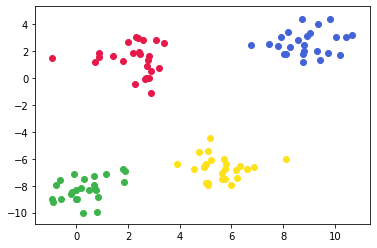

In [5]:
import sklearn.datasets
import matplotlib.pyplot as plt
from get_colors import colors

m = 100
n_features = 2
n_clusters = 4
X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=1.0)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

def show_data(X, Y, predictions=None, centroids=None):
    for i in range(n_clusters):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
        if centroids is not None:
            plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], s=300, marker='o')
    plt.show()

show_data(X, Y)

### Implement the algorithm





converged: False


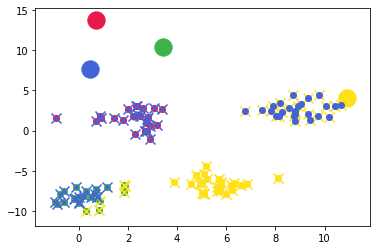

converged: False


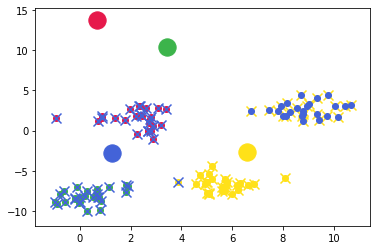

converged: False


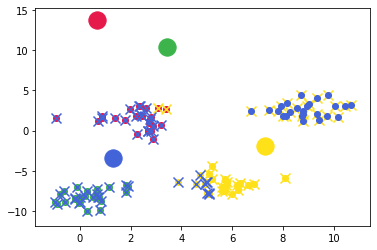

converged: False


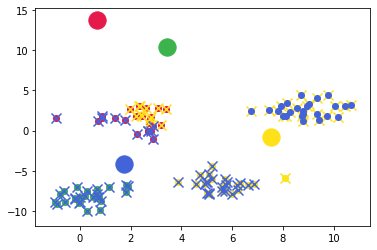

converged: False


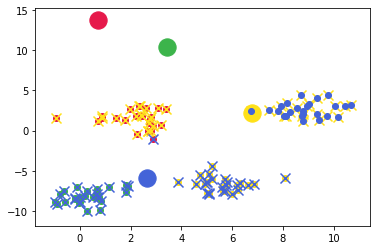

converged: False


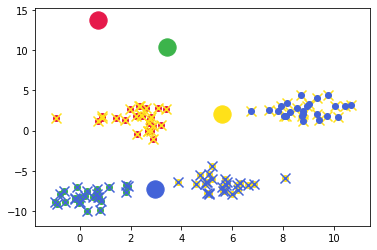

converged: True


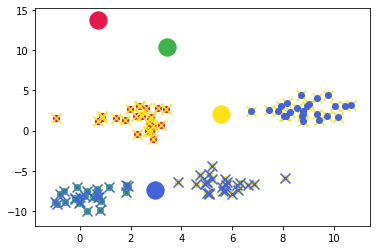

In [6]:
import numpy as np

centroids = np.random.uniform(0, 1, (n_clusters, n_features))
centroids[:, 0] *= np.ptp(X[:, 0])
centroids[:, 1] *= np.ptp(X[:, 1])
converged = False
predictions = np.zeros(m)

while not converged:
    old_predictions = np.copy(predictions)
    for idx, x in enumerate(X):
        diff = x - centroids
        dists = np.linalg.norm(diff, axis=1) # take distance from each datapoint to each centroid
        closest_centroid_idx = np.argmin(dists)
        predictions[idx] = closest_centroid_idx

    print('converged:', np.array_equal(predictions, old_predictions))
    if np.array_equal(predictions, old_predictions):
        converged = True
    if idx == 100:
        converged = True
    
    show_data(X, Y, predictions, centroids)

    for i in range(n_clusters):
        class_members = X[predictions == i]
        if len(class_members) > 0:
            new_centroid = np.mean(class_members, axis=0)
            centroids[i] = new_centroid

## Limitations of the algorithm
- if one centroid is never the closest one to any datapoint, then it will not be updated, and will represent a random point in space
    - this may not be obvious if the data is too high dimensional to visualise
- in the unsupervised case, it may not be obvious what the best K to use.
    - however, it can also be an advantage if you plan to use the output clusters as inputs to further processing
        - e.g. for image processing, K-means can be used to monochrome an image, before processing that image.
- K-means doesn't always provide the same results because the centroids are placed randomly to start with.
- as the number of dimensions of each example's features increases, the distance between any pairs of datapoints tends to a constant value, which makes the algorithm less effective as examples become harder to distinguish. This is the curse of dimensionality at work. See more [here](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)
- K-means clustering is not capable of clustering groups of data that are not blob shaped. This is because some of the K-nearest points may not be part of the same cluster. See the graph below, where K-means clustering fails to correctly cluster the datapoints to what you'd expect.

![](images/kmeans_fails.png)

## Sklearn implementation



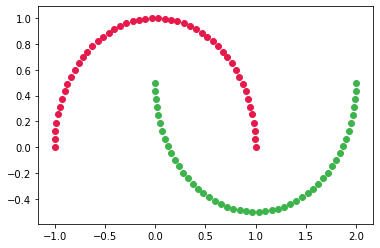

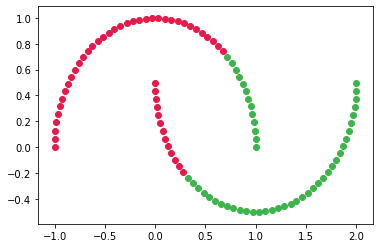

In [15]:
from sklearn.cluster import KMeans
import sklearn.datasets

moonsX, moonsY = sklearn.datasets.make_moons()
show_data(moonsX, moonsY)

kmeans = KMeans(n_clusters=2)
kmeans.fit(moonsX, moonsY)
predictions = kmeans.predict(moonsX)
show_data(moonsX, predictions)

## Image processing example

## Challenges
- implement the above for a dataset where examples have 3 features and visualise

## Summary
- K-means works by randomly initialising the positions of K **centroids**



